Successfully loaded model: gpt-4o-mini
Loaded gpt-4o-mini


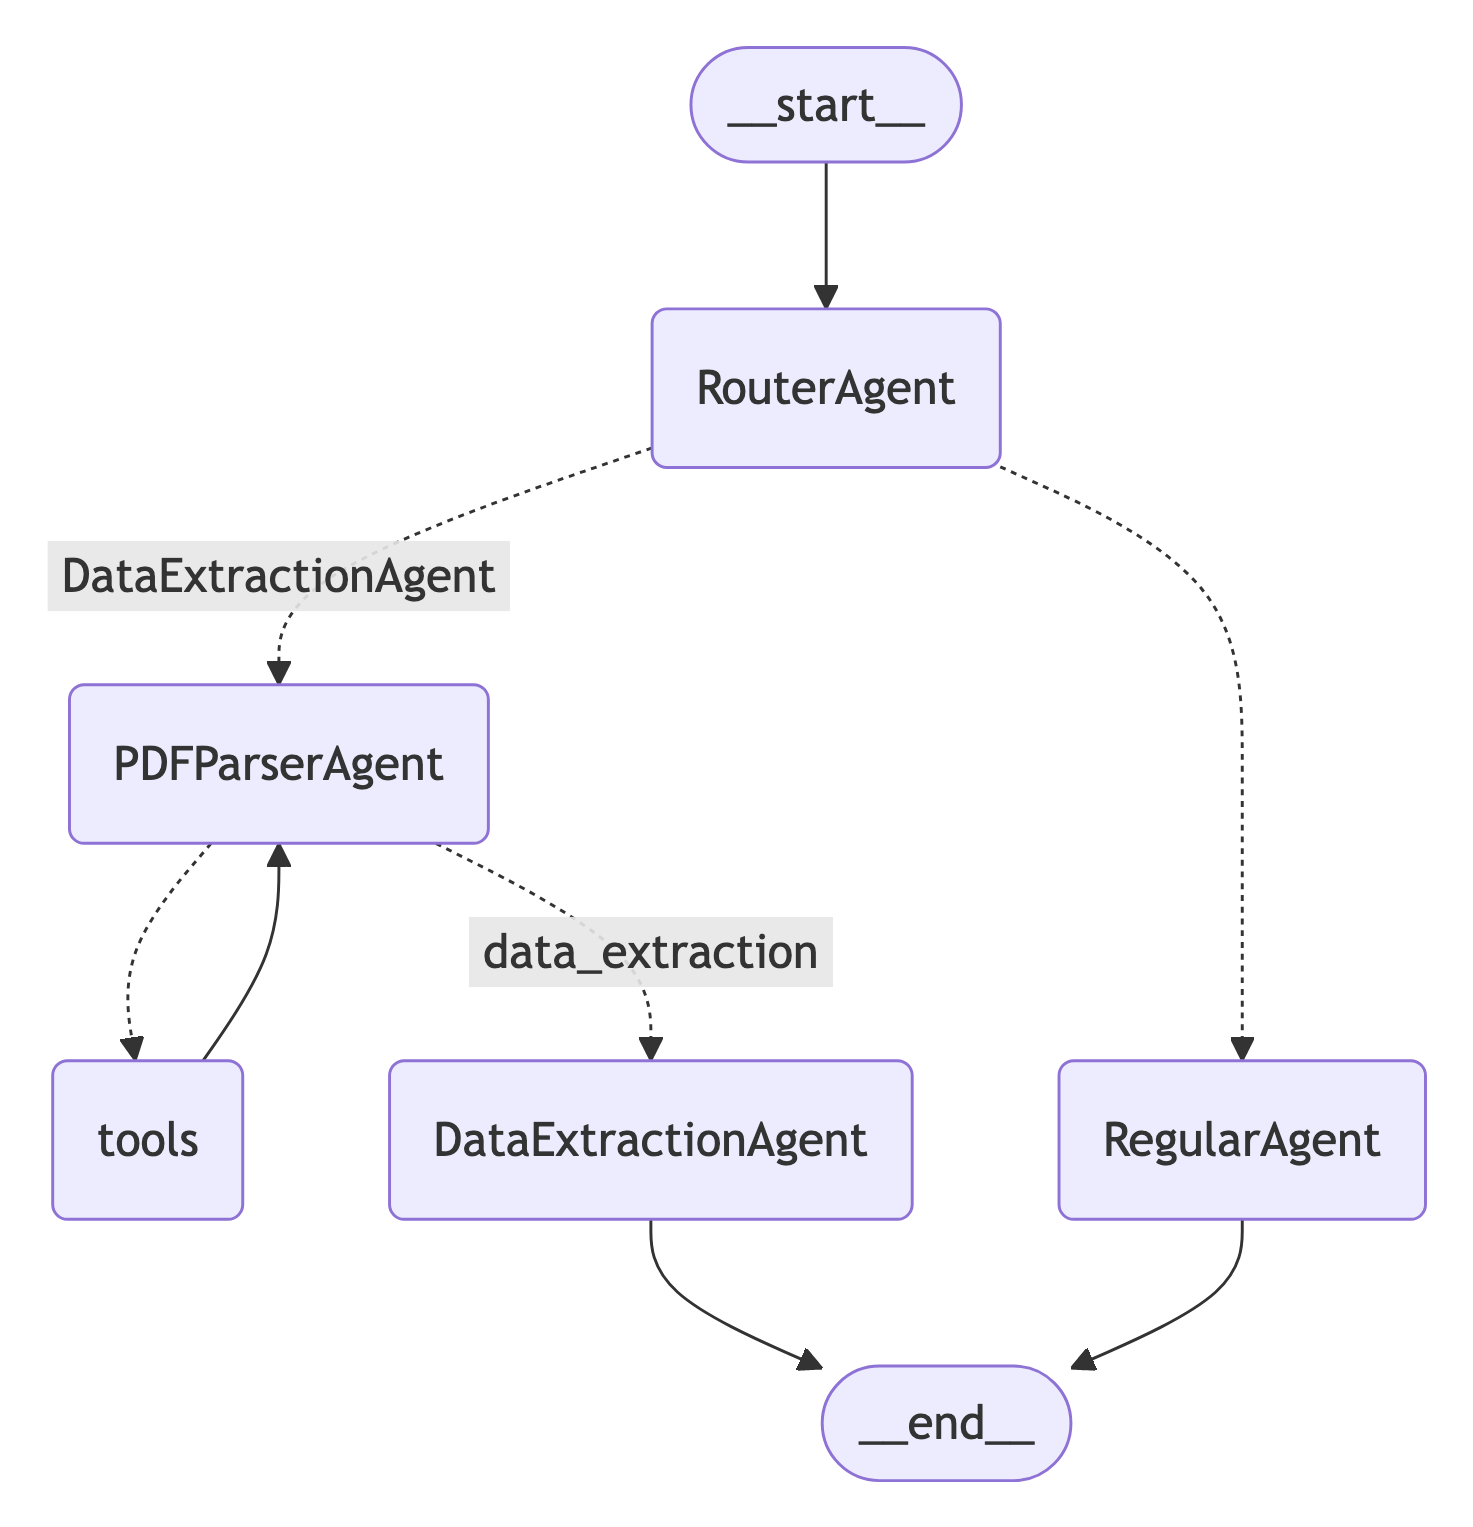

In [1]:
#Visualize the agentic system

from MOFDataExtractor.agent.agent import *

mea = MOFDataExtractorAgent()
mea.visualize()

In [2]:
# Sample usage with MOF's name from NIST-ISODB data

from MOFDataExtractor.agent.agent import MOFDataExtractorAgent
import os, json

agent = MOFDataExtractorAgent()
graph = agent.construct_graph()
path_to_pdf = "../paper_storage"

list_of_dois = os.listdir(path_to_pdf)
doi_names = ["10.1021ic301961q"]
path_to_isodb = "../nist-isodb/Library/"

for doi in doi_names:
    output_file = f"{doi}.json"
    if os.path.isfile(output_file):
        continue
    adsorbents = []
    isotherms = os.listdir(os.path.join(path_to_isodb, doi))
    isotherms = [f for f in isotherms if f.endswith(".json")]
    for iso in isotherms:
        isopath = os.path.join(path_to_isodb, doi, iso)
        print(isopath)
        with open(isopath, 'r') as f:
            iso_data = json.load(f)

        adsorbent = iso_data["adsorbent"]["name"]
        if adsorbent not in adsorbents:
            adsorbents.append(adsorbent)
    try:
        query = f"What are the crystallographic information of {' and '.join(adsorbents)} in {path_to_pdf}/{doi}"
        inputs = {"messages": query, "question": query}
        for s in graph.stream(inputs, stream_mode="values"):
            message = s["messages"][-1]
            if isinstance(message, tuple):
                print(message)
            else:
                message.pretty_print()
                final_output = message.content

        with open(output_file, "w") as f:
            if isinstance(final_output, tuple):
                f.write(str(final_output))
            else:
                f.write(final_output.__str__())

        print(f"Final output saved to {output_file}")
    except:
        with open("log.txt", "a") as f:
            f.write(f"{doi}\n")


Successfully loaded model: gpt-4o-mini
Loaded gpt-4o-mini
../nist-isodb/Library/10.1021ic301961q/10.1021Ic301961q.isotherm1.json
../nist-isodb/Library/10.1021ic301961q/10.1021Ic301961q.isotherm2.json
================================ Human Message =================================

What are the crystallographic information of CAU-8 in ../paper_storage/10.1021ic301961q
================================ Human Message =================================

What are the crystallographic information of CAU-8 in ../paper_storage/10.1021ic301961q
================================== Ai Message ==================================
Tool Calls:
  convert_pdfs_to_text (call_oLuH0Kq50yCKz9hRAbPkZebC)
 Call ID: call_oLuH0Kq50yCKz9hRAbPkZebC
  Args:
    path_to_pdfs: ../paper_storage/10.1021ic301961q
TOOL CALL {'name': 'convert_pdfs_to_text', 'args': {'path_to_pdfs': '../paper_storage/10.1021ic301961q'}, 'id': 'call_oLuH0Kq50yCKz9hRAbPkZebC', 'type': 'tool_call'}
================================= Tool Message

In [3]:
# Sample usage without MOF's name

# Sample usage with MOF's name from NIST-ISODB data

from MOFDataExtractor.agent.agent import MOFDataExtractorAgent
import os, json

agent = MOFDataExtractorAgent()
graph = agent.construct_graph()
path_to_pdf = "../paper_storage"

list_of_dois = os.listdir(path_to_pdf)
doi_names = ["10.1021ic301961q"]
path_to_isodb = "../nist-isodb/Library/"

for doi in doi_names:
    try:
        query = f"What are the crystallographic information of the materials in {path_to_pdf}/{doi}"
        inputs = {"messages": query, "question": query}
        for s in graph.stream(inputs, stream_mode="values"):
            message = s["messages"][-1]
            if isinstance(message, tuple):
                print(message)
            else:
                message.pretty_print()
                final_output = message.content

        with open(output_file, "w") as f:
            if isinstance(final_output, tuple):
                f.write(str(final_output))
            else:
                f.write(final_output.__str__())

        print(f"Final output saved to {output_file}")
    except:
        with open("log.txt", "a") as f:
            f.write(f"{doi}\n")


Successfully loaded model: gpt-4o-mini
Loaded gpt-4o-mini
================================ Human Message =================================

What are the crystallographic information of the materials in ../paper_storage/10.1021ic301961q
================================ Human Message =================================

What are the crystallographic information of the materials in ../paper_storage/10.1021ic301961q
================================== Ai Message ==================================
Tool Calls:
  convert_pdfs_to_text (call_JJfly3ighlbu76l0UxNmCk4b)
 Call ID: call_JJfly3ighlbu76l0UxNmCk4b
  Args:
    path_to_pdfs: ../paper_storage/10.1021ic301961q
TOOL CALL {'name': 'convert_pdfs_to_text', 'args': {'path_to_pdfs': '../paper_storage/10.1021ic301961q'}, 'id': 'call_JJfly3ighlbu76l0UxNmCk4b', 'type': 'tool_call'}
================================= Tool Message =================================
Name: convert_pdfs_to_text

"A new ketoEfunctionalized microporous AlEbased \nmetalEorganic